# A modified optimizer that uses an arbitrary function y=f(seq)

In [38]:
from badass.mld.general_optimizer import ArbitraryPredictorOptimizer

from typing import List, Dict, Any, Tuple
import logging
logger = logging.getLogger(__name__)

In [39]:
from Bio.Align import substitution_matrices
matrix = substitution_matrices.load("BLOSUM62")

def dummy_scorer(seqs: List[str]) -> List[float]:
    # blosum score to the reference sequence
    target_seq = "MCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWY"
    return [sum(matrix[ref][seq] for ref, seq in zip(target_seq, seq)) for seq in seqs]

In [40]:
starting_seq = ''.join(['A'] * len('MCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWY'))

In [41]:
logging.basicConfig(level=logging.DEBUG)

In [43]:
params = {
    'seqs_per_iter': 500,
    'num_iter': 200,
    'num_mutations': 10,
    'score_threshold': 35,
    'T': 1.5,
    'cooling_rate': 0.9,
    'forbidden_sites': [1, len(starting_seq)]  # Protect termini
}

optimizer = ArbitraryPredictorOptimizer(
    scoring_function=dummy_scorer,
    reference_sequence=starting_seq,
    optimization_params=params
)

# Run optimization
results = optimizer.optimize()
print(f"Best sequence: {results['best_sequence']}")
print(f"Best score: {results['best_score']}")

INFO:badass.mld.general_optimizer:Initializing SequenceOptimizer
INFO:badass.mld.general_optimizer:Reference sequence length: 100
INFO:badass.mld.general_optimizer:Optimization parameters: {'seqs_per_iter': 500, 'num_iter': 200, 'T': 1.5, 'cooling_rate': 0.9, 'num_mutations': 10, 'forbidden_sites': [1, 100], 'batch_size': 32, 'score_threshold': 35}
INFO:badass.mld.general_optimizer:Computing initial score matrix...
INFO:badass.mld.general_optimizer:Generated 1862 single mutants
DEBUG:badass.mld.general_optimizer:Scoring batch 1 of 59
DEBUG:badass.mld.general_optimizer:Scoring batch 2 of 59
DEBUG:badass.mld.general_optimizer:Scoring batch 3 of 59
DEBUG:badass.mld.general_optimizer:Scoring batch 4 of 59
DEBUG:badass.mld.general_optimizer:Scoring batch 5 of 59
DEBUG:badass.mld.general_optimizer:Scoring batch 6 of 59
DEBUG:badass.mld.general_optimizer:Scoring batch 7 of 59
DEBUG:badass.mld.general_optimizer:Scoring batch 8 of 59
DEBUG:badass.mld.general_optimizer:Scoring batch 9 of 59
DEBU

Best sequence: AAAAAAHAAAAAAAAAAAWAAAAAAAHAAAAAAAAAAAWAAAAAAAHAAAAAAAAAAAWAAAAAAAHAAAAAAAAAAAWAAAAAAAHAAAAAAAAAAAWA
Best score: 15.0


INFO:badass.mld.general_optimizer:Plotting optimization history
DEBUG:matplotlib.ticker:vmin 1.153405831716964 vmax 1.5876842327800076
DEBUG:matplotlib.ticker:ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG:matplotlib.ticker:vmin 1.153405831716964 vmax 1.5876842327800076
DEBUG:matplotlib.ticker:ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02])
DEBUG:matplotlib.ticker:vmin 1.153405831716964 vmax 1.5876842327800076
DEBUG:matplotlib.ticker:ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG:matplotlib.ticker:vmin 1.153405831716964 vmax 1.5876842327800076
DEBUG:matplotlib.ticker:ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG:matplotlib.ticker:vmin 1.153405831716964 vmax 1.5876842327800076
DEBUG:matplotlib.ticker:ticklocs array([2.e-

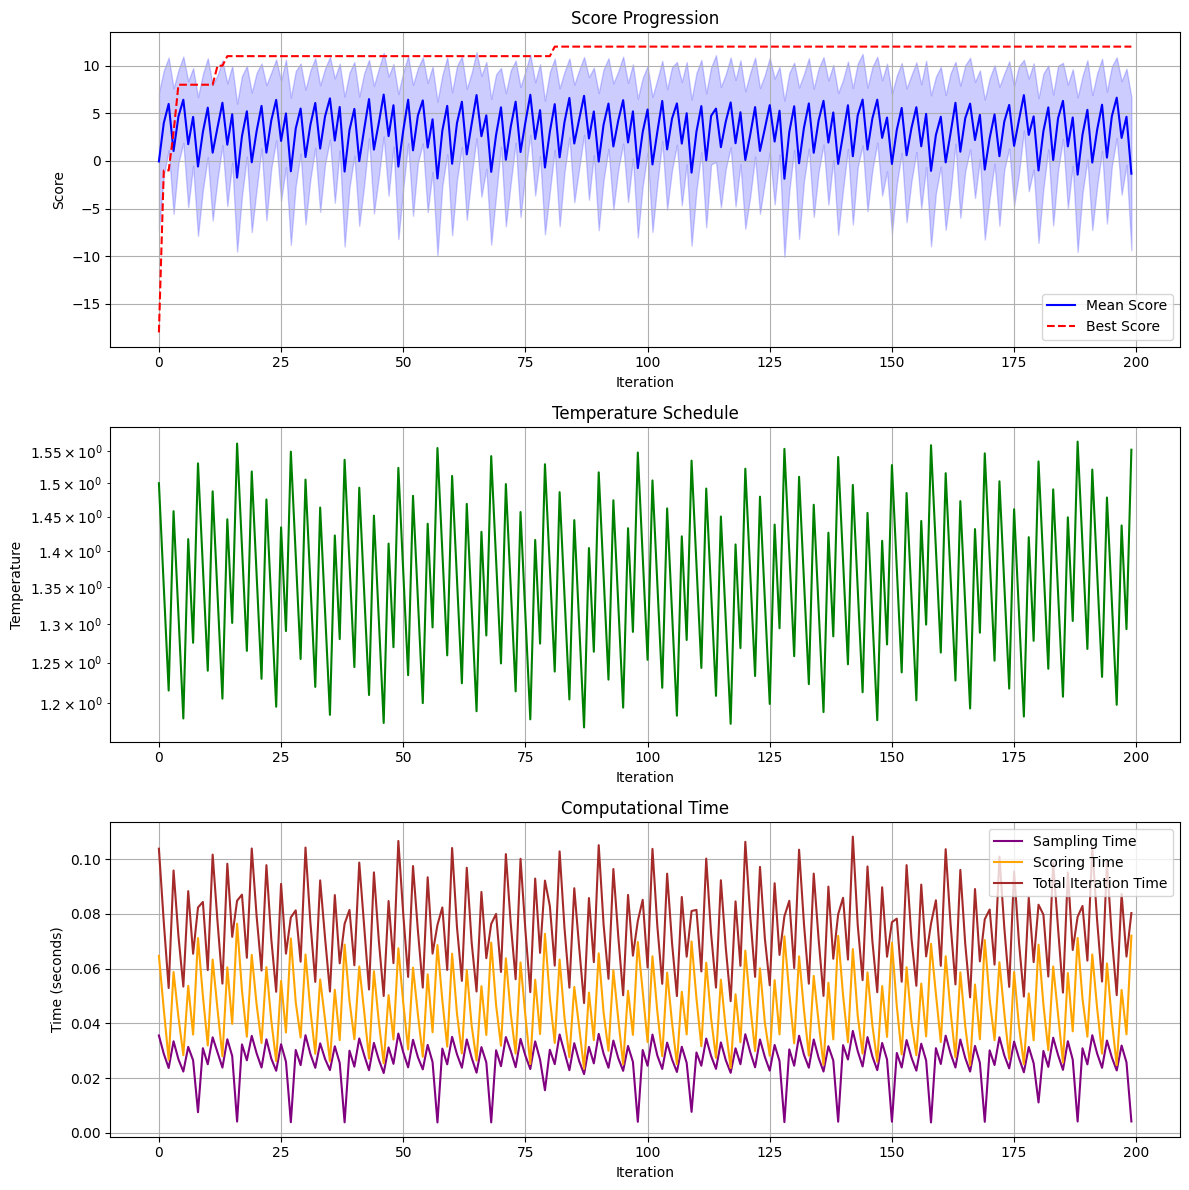

In [44]:
optimizer.plot_optimization_history()